In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('TehranHouse.csv')

In [55]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [56]:
df.shape

(3479, 8)

In [57]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [58]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [59]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [60]:

df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)
df['Address'] = df['Address'].astype(str)
df['Address'],unique = pd.factorize(df['Address'])
df['Area'] = pd.to_numeric(df['Area'],errors='coerce')

In [61]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,0,1.850000e+09,61666.67
1,60.0,1,1,1,1,0,1.850000e+09,61666.67
2,79.0,2,1,1,1,1,5.500000e+08,18333.33
3,95.0,2,1,1,1,2,9.025000e+08,30083.33
4,123.0,2,1,1,1,3,7.000000e+09,233333.33


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

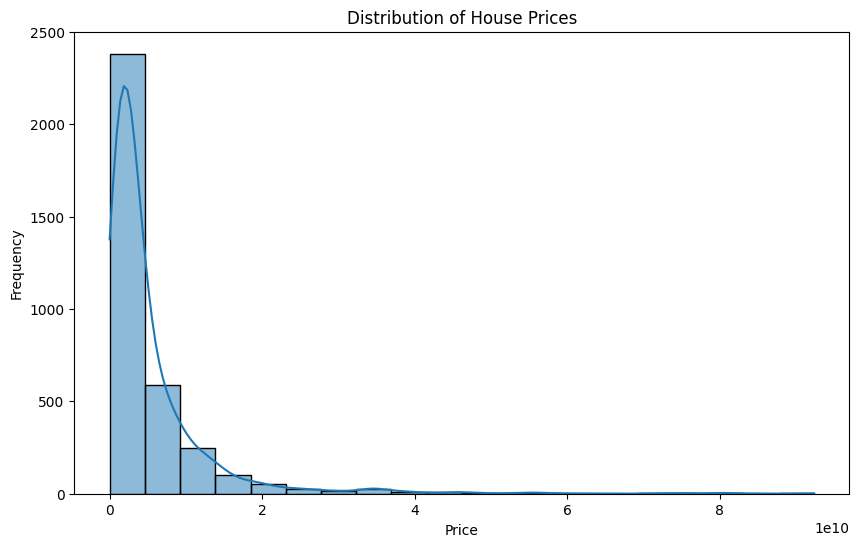

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

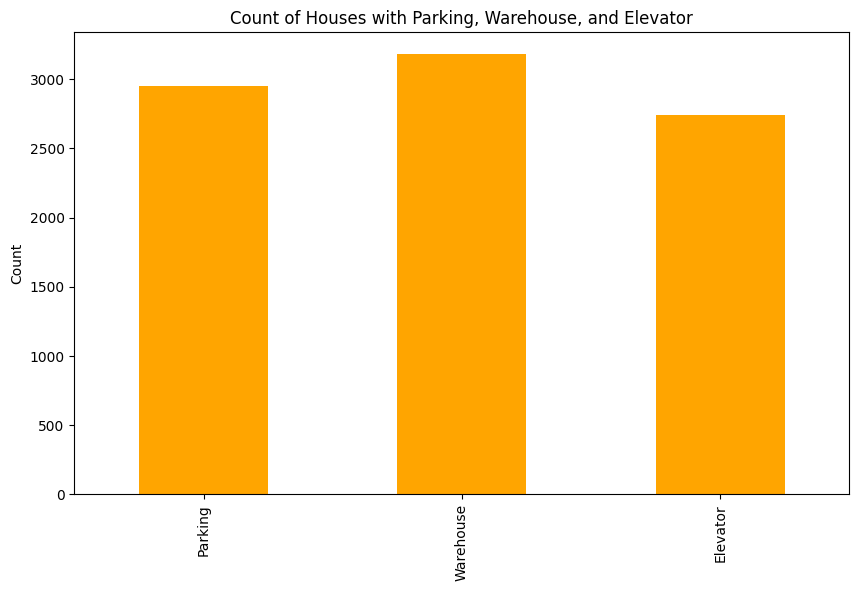

In [64]:
plt.figure(figsize=(10, 6))
df[['Parking', 'Warehouse', 'Elevator']].sum().plot(kind='bar' ,color='orange')
plt.title('Count of Houses with Parking, Warehouse, and Elevator')
plt.ylabel('Count')
plt.show()


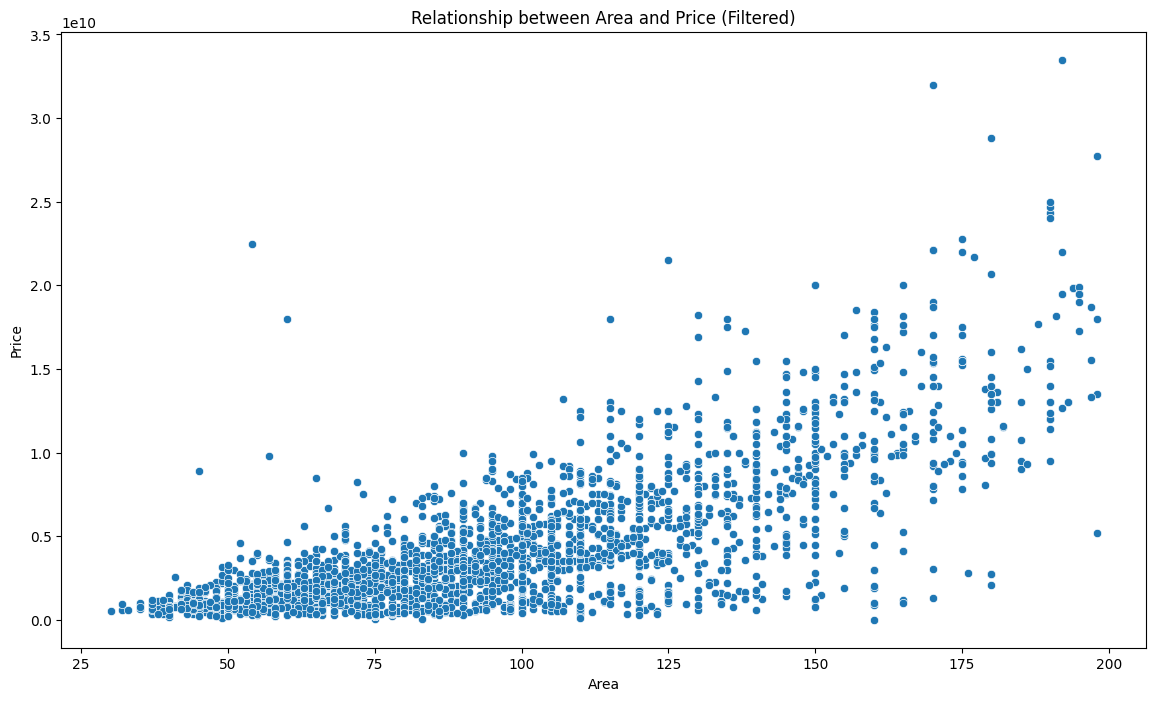

In [65]:

filtered_df = df[df['Area'] < 200]

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Area', y='Price', data=filtered_df)
plt.title('Relationship between Area and Price (Filtered)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


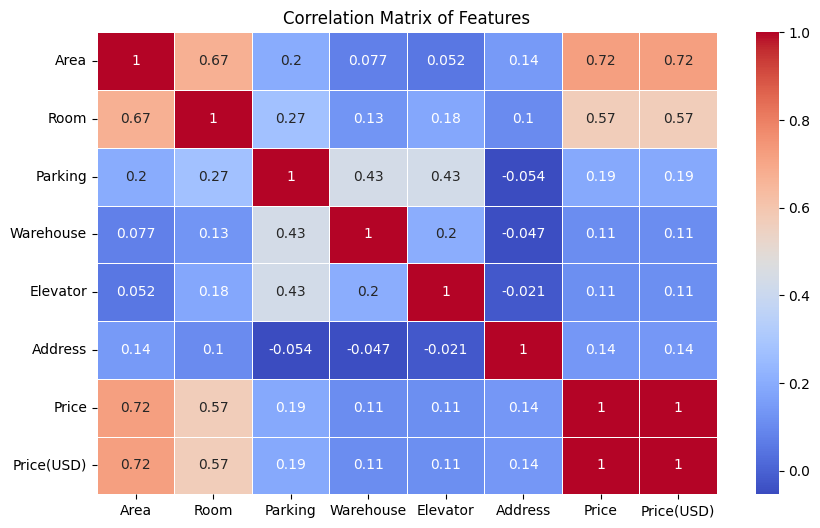

In [66]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
